# Worksheet 16

Name: Mark Maci 
UID: U30478693

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [2]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    result = b
    for j in range(len(X)):
        result += alpha_i[j] * Y[j] * np.dot(X[j], x)
    return np.sign(result)

images = []
for _ in range(epochs):
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    prediction = predict(alpha_i, b, x)
    if prediction != y:
        error = True
        alpha_i[i] += learning_rate * y
        b += learning_rate * y           
    else:
        error = False
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [5]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

def gaussian(x_i, x_j, sigma):
    return np.exp(-np.linalg.norm(x_i - x_j) ** 2 / (2 * sigma ** 2))

def kernel(alpha_i, b, x, kernel_func, *args):
    result = b
    for j in range(len(X)):
        result += alpha_i[j] * Y[j] * kernel_func(X[j], x, *args)
    return np.sign(result)

def predict_many_kernel(alpha_i, b, Z, kernel_func, *args):
    res = []
    for i in range(len(Z)):
        res.append(kernel(alpha_i, b, Z[i], kernel_func, *args))
    return np.array(res)

X, labels = datasets.make_moons(n_samples=100, noise=0.1, random_state=0)
Y = np.array([1 if label == 1 else -1 for label in labels])

print("Y", Y)

Y [-1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1
 -1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1
  1  1 -1 -1]


b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

You would reduce the tuning parameter n of the kernel function which would reduce the decision boundary complexity and thus reduce the overfitting.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

This suggests that the model is too simple and we should increase the tuning parameter sigma of the kernel function to increase the decision boundary complexity and thus reduce the underfitting.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

None 0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


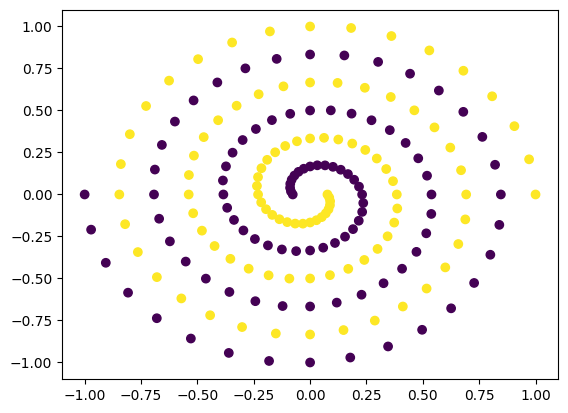

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]



plt.scatter(x[:,0], x[:,1], c=y)

KeyboardInterrupt: 

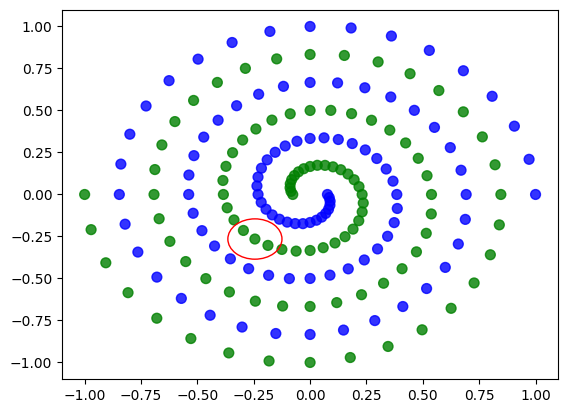

In [9]:
# Define the kernel SVM functions provided earlier

def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

def gaussian(x_i, x_j, sigma):
    return np.exp(-np.linalg.norm(x_i - x_j) ** 2 / (2 * sigma ** 2))

def kernel(alpha_i, b, x, kernel_func, *args):
    result = b
    for j in range(len(X)):
        result += alpha_i[j] * Y[j] * kernel_func(X[j], x, *args)
    return np.sign(result)

def predict_many_kernel(alpha_i, b, Z, kernel_func, *args):
    res = []
    for i in range(len(Z)):
        res.append(kernel(alpha_i, b, Z[i], kernel_func, *args))
    return np.array(res)

def snap_kernel(x, alpha_i, b, error, kernel_func, *args):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], color=cs[(Y > 0).astype(int)].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r', fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y', fill=False))
   
    Z = predict_many_kernel(alpha_i, b, meshData, kernel_func, *args)
    Z = np.array([0 if z <= 0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    plt.close()
    return fig, ax

X, Y = x, np.array([1 if label == 1 else -1 for label in y])

epochs = 100
learning_rate = 0.05

alpha_i = np.zeros(len(X))
b = 0

images = []

for _ in range(epochs):
    i = np.random.randint(0, len(X))
    error = False
    x_i, y_i = X[i], Y[i]s
    
    prediction = kernel(alpha_i, b, x_i, gaussian, 1.0)
    if prediction != y_i:
        error = True
        alpha_i[i] += learning_rate * y_i
        b += learning_rate * y_i
        
    fig, _ = snap_kernel(x_i, alpha_i, b, error, gaussian, 1.0)
    images.append(fig)

plt.figure(figsize=(10, 8))
snap_kernel(X[0], alpha_i, b, False, gaussian, 1.0)
plt.show()
